# Peaks vs resolution

## Import data

In [1]:
import numpy as np

resolutions = [200, 300, 800, 1000, 1500, 3000, 5000, 7000, 10000, 30000]

filepath_resolution = '../data/Resolution'
resolution_filenames = [filepath_resolution + '/' + str(resolution) + '.txt' for resolution in resolutions]
filename_real = '../data/Real_data/ST001706/1D/RCCdata.txt'

data_real = np.loadtxt(filename_real, dtype=float)
data_simulate = [np.loadtxt(filename, dtype=float) for filename in resolution_filenames]

In [2]:
data_real.shape
len(data_real[0])

32697

### Exploratory Analysis

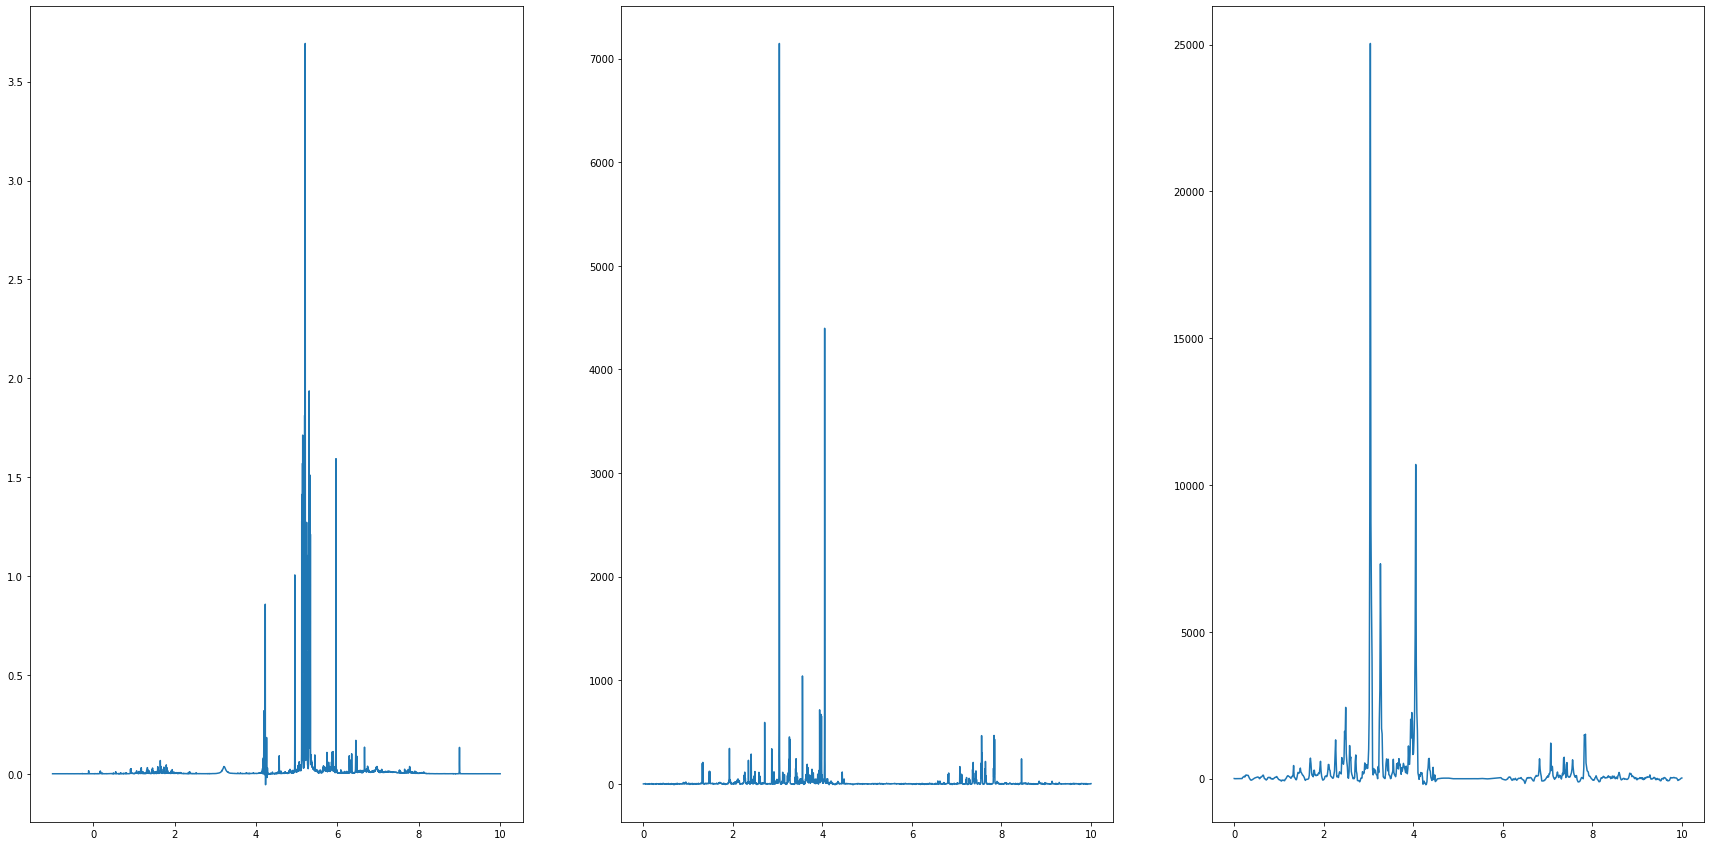

In [4]:
#Plot samples

import matplotlib.pyplot as plt

n_rows, n_cols = 1, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 15))
x_axis_test = np.linspace(-1, 10, num=data_real.shape[1])
x_axis_10000 = np.linspace(0, 10, num=10000)
x_axis_800 = np.linspace(0, 10, num=800)
axes[0].plot(x_axis_test, data_real[0])
axes[1].plot(x_axis_10000, data_simulate[-2])
axes[2].plot(x_axis_800, data_simulate[2])
plt.show()

## Compute Number of peaks

In [8]:
import scipy as scy
from scipy.signal import peak_widths, find_peaks

peaks_real = find_peaks(data_real[0], height=0.005)
peaks_width_real = np.mean(peak_widths(data_real[0], peaks_real[0])[0]) * (11/len(data_real[0]))
nb_peaks_real = len(peaks_real[0])


peaks_simulate = [find_peaks(simulation, height=0.005) for simulation in data_simulate]
peaks_width_simulate = [np.mean(peak_widths(data_simulate[i],
                                            peaks_simulate[i][0])[0]) * (10/len(data_simulate[i])) 
                        for i in range(len(data_simulate))]
nb_peaks_simulate = [len(peaks_simulate[i][0]) for i in range(len(peaks_simulate))]

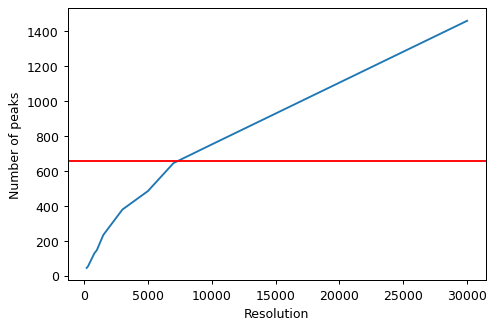

In [13]:
plt.figure(dpi= 90)
plt.plot(resolutions, nb_peaks_simulate)
plt.axhline(y = nb_peaks_real, color = 'r', linestyle = '-')
plt.ylabel("Number of peaks")
plt.xlabel("Resolution")
plt.show()

## Peak width

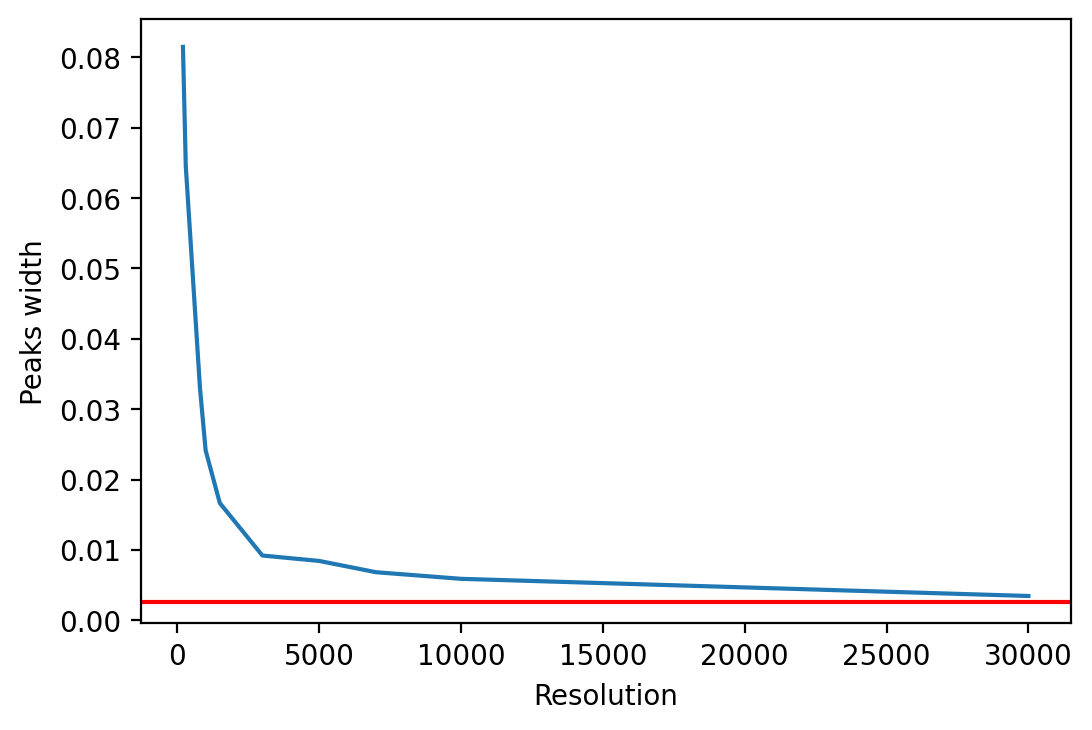

In [10]:
plt.figure(dpi= 200)
plt.plot(resolutions, peaks_width_simulate)
plt.axhline(y = peaks_width_real, color = 'r', linestyle = '-')
plt.ylabel("Peaks width")
plt.xlabel("Resolution")
plt.show()